# Analyseren van waterkwaliteitsdata uit CSV-bestanden

In dit notebook gaan we aan de slag met het ophalen van gegevens uit een CSV-bestand en het verwerken van deze data met behulp van de Pandas bibliotheek in Python. De data over oppervlakte water kwaliteit word geleverd in csv formaat. CSV-bestanden zijn een van de meest gebruikte formaten voor het opslaan van gestructureerde data, zoals tabellen met rijen en kolommen. Het doel van dit notebook is om je te laten zien hoe je deze data kunt inladen in een pandas dataframe, de gegevens kunt verkennen, en vervolgens enkele basisbewerkingen kunt uitvoeren om de data klaar te maken voor verdere analyse.

### 1. Installeren van benodigde bibliotheken
Zorg ervoor dat je de benodigde bibliotheek hebt geïnstalleerd. We maken gebruik van pandas en matplotlib. Je kunt het installeren met het volgende commando in een notebook-cel (als je het nog niet hebt geïnstalleerd):

In [ ]:
!pip install pandas matplotlib

### 2. Importeren van de bibliotheek
Importeer vervolgens de benodigde bibliotheken in je notebook:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

### 3. Data ophalen uit een CSV

Plak de data uit sharepoint in de data folder. Nu kun je een CSV-bestand inladen en omzetten naar een Pandas DataFrame. Gebruik de functie pd.read_csv() om de gegevens in te laden.

In [ ]:
# Inladen CSV-bestand in een Pandas DataFrame
# Voorbeeld pad, een ander deel van de Amstel of HyBio data kan je ook nemen
df = pd.read_csv('../data/01 FyChem data/ADM016.csv', delimiter=',')
# df = pd.read_csv('../data/02 HyBio data/ADM138.csv', delimiter=',')

# Converteer de datum kolom naar datetime formaat en zet het als de index
df['datum'] = pd.to_datetime(df['datum'])

# Zet de meetwaarde naar een numerieke waarde inplaats van string
df['meetwaarde'] = pd.to_numeric(df['meetwaarde'], errors='coerce')

# Bekijk de eerste 5 rijen van de DataFrame
df.head()

Wil je alle data (csv's) in 1 dataframe stoppen, zodat je een analyse kan doen van alle data, dan doe je het volgende:

In [ ]:
# Pad naar de map met CSV-bestanden
# Voorbeeld pad, alle HyBio data kan je ook nemen
map_pad = '../data/01 FyChem data'  
# map_pad = '../data/02 HyBio data'  

# Vind alle CSV-bestanden in de map
alle_csvs = glob.glob(os.path.join(map_pad, "*.csv"))

# Lees alle CSV-bestanden en voeg ze samen tot één DataFrame
dataframes = [pd.read_csv(csv, delimiter=',',encoding='latin1') for csv in alle_csvs]
samengevoegd_df = pd.concat(dataframes, ignore_index=True)

# Converteer de datum kolom naar datetime formaat en zet het als de index
samengevoegd_df['datum'] = pd.to_datetime(samengevoegd_df['datum'])

# Zet de meetwaarde naar een numerieke waarde inplaats van string
samengevoegd_df['meetwaarde'] = pd.to_numeric(samengevoegd_df['meetwaarde'], errors='coerce')

# Bekijk de eerste 5 rijen van de DataFrame
samengevoegd_df.head()

### 4. Informatie over de dataframe
Het is handig om wat basisinformatie te verkrijgen over het DataFrame, zoals het aantal rijen en kolommen, en de datatypes van de kolommen. Dit kan gedaan worden met de .info() methode:

In [ ]:
df.info()

Voor de "01 FyChem data" zijn de belangrijkste kolommen: parametercode en meetwaarde.
Voordat we inhoudelijk naar de metingen zelf gaan kijken, is het belangrijk om eerst een overzicht te krijgen van welke parameters er in de dataset zitten.

Elke meting heeft een parametercode, bijvoorbeeld ECOLI of PH, en een bijbehorende beschrijvende naam, zoals Escherichia coli of pH. Soms worden dezelfde codes gebruikt op verschillende plekken of in verschillende projecten, dus het is nuttig om deze codes te koppelen aan hun betekenis.

Daarom maken we hieronder een overzicht van alle unieke combinaties van parametercode en beschrijvende naam (fewsparameternaam) die in de dataset voorkomen.

In [162]:
df.groupby('parametercode')['fewsparameternaam'].unique().reset_index()

,parametercode,fewsparameternaam
0,1234T4ClBen,"[1,2,3,4-tetrachloorbenzeen (ug/l)]"
1,1235T4ClBen,"[1,2,3,5-tetrachloorbenzeen (ug/l)]"
2,123TClBen,"[1,2,3-trichloorbenzeen (ug/l)]"
3,123TClC3a,"[1,2,3-trichloorpropaan (ug/l)]"
4,123benztazl,"[1,2,3-benzotriazool (ug/l)]"
5,124TClBen,"[1,2,4-trichloorbenzeen (ug/l)]"
6,12DClBen,"[1,2-dichloorbenzeen (ug/l)]"
7,135TClBen,"[1,3,5-trichloorbenzeen (ug/l)]"
8,13DCPRE,"[1,3-dichloorpropeen (ug/l)]"
9,13DClBen,"[1,3-dichloorbenzeen (ug/l)]"


Voor de "02 HyBio data" zijn de belangrijkste kolommen: WNA nederlandse soortnaam, lengteklasse en meetwaarde.
Onderstaande kan je uitvoeren om te zien welke soorten er zijn gevangen/gemeten en onder welke klasses.

In [158]:
df.groupby("WNA nederlandse soortnaam")["lengteklasse"].unique()

WNA nederlandse soortnaam
Baars                       [VL-006cm, VL-016cm, VL-007cm, VL-022cm, VL-01...
Blankvoorn                  [VL-011cm, VL-013cm, VL-014cm, VL-015cm, VL-01...
Brasem                      [VL-010cm, VL-017cm, VL-018cm, VL-020cm, VL-02...
Driedoornige stekelbaars                                           [VL-003cm]
Europese meerval                                                   [VL-153cm]
Kolblei                     [VL-013cm, VL-015cm, VL-017cm, VL-022cm, VL-01...
Pos                         [VL-010cm, VL-011cm, VL-012cm, VL-009cm, VL-00...
Snoekbaars                  [VL-007cm, VL-008cm, VL-006cm, VL-015cm, VL-00...
Winde                                                              [VL-030cm]
Zwartbekgrondel                      [VL-008cm, VL-009cm, VL-015cm, VL-010cm]
Name: lengteklasse, dtype: object

### 5. Inzichtelijk maken data (grafieken)
Om patronen, trends of uitschieters in onze waterkwaliteitsdata beter te begrijpen, is het vaak nuttig om de gegevens visueel weer te geven. Grafieken maken data in één oogopslag leesbaar en helpen bij het opsporen van opvallende of afwijkende metingen.

We gebruiken hiervoor matplotlib, een veelgebruikte Python-bibliotheek voor datavisualisatie. Denk bijvoorbeeld aan tijdreeksen van een parameter, of een vergelijking tussen meetlocaties.

Hieronder laten we een eenvoudig voorbeeld zien van hoe je een grafiek maakt van een parameter in de tijd.

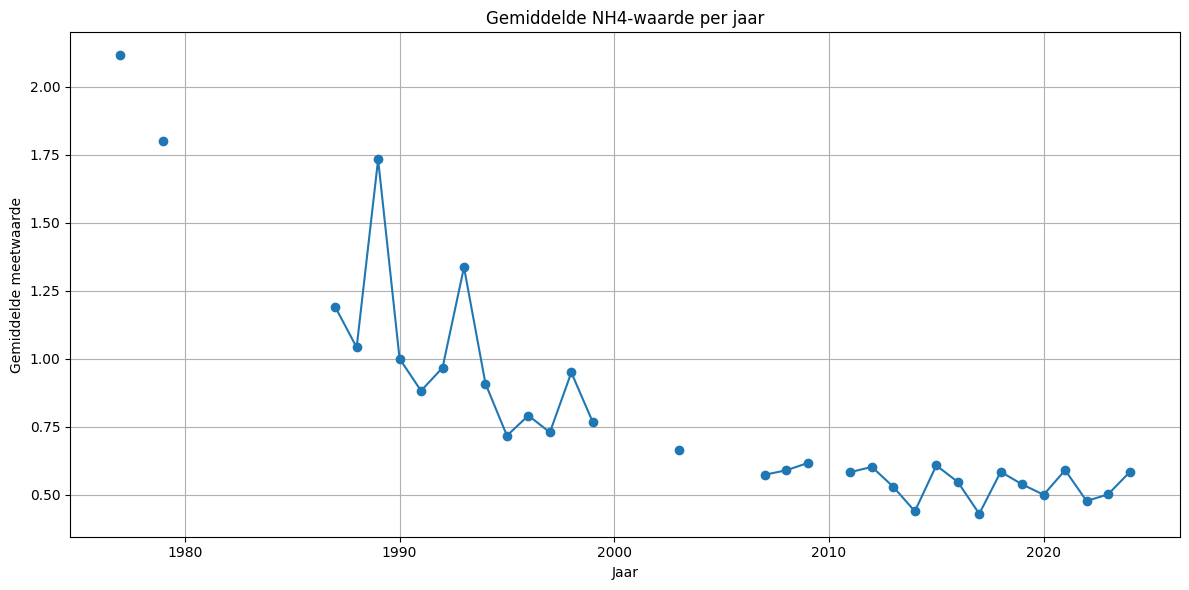

In [4]:
parametercode = "NH4"

# Zorg dat 'datum' een datetime is
plot_data = df[df['parametercode'] == parametercode].copy()
plot_data['datum'] = pd.to_datetime(plot_data['datum'])
plot_data.set_index('datum', inplace=True)

# Groeperen per jaar en het gemiddelde nemen
plot_data['meetwaarde'] = pd.to_numeric(plot_data['meetwaarde'], errors='coerce')
yearly_data = plot_data.resample('Y').mean(numeric_only=True)

# Plotten
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index.year, yearly_data['meetwaarde'], marker='o', linestyle='-')
plt.title(f'Gemiddelde {parametercode}-waarde per jaar')
plt.xlabel('Jaar')
plt.ylabel('Gemiddelde meetwaarde')
plt.grid(True)
plt.tight_layout()
plt.show()

### 6. Ga nu zelf aan de slag 
Nu je hebt gezien hoe je de meetgegevens uit CSV-bestanden kunt inladen, verkennen en visualiseren, is het tijd om zelf aan de slag te gaan met de data!

Probeer bijvoorbeeld eens het volgende:

- Filter de data op een andere parameter (zoals ECOLI, NO3, of TURB).
- Maak een grafiek van de meetwaarden over de tijd per locatie.
- Zoek uit welke parameters het vaakst gemeten worden.
- Vergelijk waarden tussen locaties of maanden.
- Bekijk uitschieters of trends in specifieke periodes.

En denk na over jouw slimme oplossing om de Amstel een stem te geven!